The NBA SQLite database (2.35GB) was selected for analysis.
The "game" table contains 65,698 games with detailed statistics.

For computational efficiency, sampling and statistical analysis were performed on this table.

This dataset satisfies the ≥50MB requirement and contains natural clusters (teams) and stratification variables (seasons).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("C:/Users/user/Desktop/nba_dataset/csv/game.csv")

print(df.shape)
df.head()


(65698, 55)


,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


In [2]:
num_cols = [
    "pts_home",
    "pts_away",
    "reb_home",
    "reb_away",
    "ast_home",
    "ast_away",
    "fg_pct_home",
    "fg_pct_away"
]


full_mean = df[num_cols].mean()
full_var = df[num_cols].var()
full_iqr = df[num_cols].quantile(0.75) - df[num_cols].quantile(0.25)

print("Full dataset mean:\n", full_mean)
print("\nFull dataset variance:\n", full_var)
print("\nFull dataset IQR:\n", full_iqr)


Full dataset mean:
 pts_home       104.619136
pts_away       100.991567
reb_home        43.761432
reb_away        42.119645
ast_home        23.940994
ast_away        22.135419
fg_pct_home      0.467321
fg_pct_away      0.454909
dtype: float64

Full dataset variance:
 pts_home       217.796308
pts_away       207.900503
reb_home        50.239094
reb_away        47.161123
ast_home        32.422238
ast_away        28.953062
fg_pct_home      0.003531
fg_pct_away      0.003507
dtype: float64

Full dataset IQR:
 pts_home       19.000
pts_away       18.000
reb_home        9.000
reb_away       10.000
ast_home        8.000
ast_away        8.000
fg_pct_home     0.079
fg_pct_away     0.078
dtype: float64


Numeric features such as points, field goal percentage, and rebounds were selected for statistical analysis.

Season was used for stratified sampling to preserve temporal distribution.

Home team ID was used for cluster sampling, as NBA teams represent natural clusters.


In [3]:
random_sample = df.sample(frac=0.1, random_state=42)

print("Random sample shape:", random_sample.shape)


Random sample shape: (6570, 55)


Simple random sampling selects observations randomly without considering dataset structure.

It serves as a baseline for comparison with other sampling methods.


In [4]:
counts = df["season_id"].value_counts()
df_valid = df[df["season_id"].isin(counts[counts >= 2].index)]

strat_sample, _ = train_test_split(
    df_valid,
    train_size=0.1,
    stratify=df_valid["season_id"],
    random_state=42
)

print("Stratified sample shape:", strat_sample.shape)

Stratified sample shape: (6568, 55)


Stratified sampling ensures that each season is proportionally represented in the sample.

This helps preserve temporal patterns and improves representativeness.


In [5]:
teams = df["team_id_home"].unique()

np.random.seed(42)
selected_teams = np.random.choice(teams, size=5, replace=False)

cluster_sample = df[df["team_id_home"].isin(selected_teams)]

print("Cluster sample shape:", cluster_sample.shape)


Cluster sample shape: (1453, 55)


Cluster sampling selects entire groups of observations.

In this case, teams were used as natural clusters, and all games involving selected teams were included.


In [6]:
comparison = pd.DataFrame({
    "Full": df[num_cols].mean(),
    "Random": random_sample[num_cols].mean(),
    "Stratified": strat_sample[num_cols].mean(),
    "Cluster": cluster_sample[num_cols].mean()
})

comparison


,Full,Random,Stratified,Cluster
pts_home,104.619136,104.728463,104.890378,100.086029
pts_away,100.991567,101.219787,101.019032,99.875430
reb_home,43.761432,43.630952,43.792426,42.606322
reb_away,42.119645,41.919290,42.060885,41.982040
ast_home,23.940994,23.849667,24.050953,24.186063
ast_away,22.135419,22.142857,21.968104,22.959770
fg_pct_home,0.467321,0.468038,0.469471,0.457128
fg_pct_away,0.454909,0.456354,0.454248,0.456233


In [7]:
variance_comparison = pd.DataFrame({
    "Full": df[num_cols].var(),
    "Random": random_sample[num_cols].var(),
    "Stratified": strat_sample[num_cols].var(),
    "Cluster": cluster_sample[num_cols].var()
})

variance_comparison


,Full,Random,Stratified,Cluster
pts_home,217.796308,212.402737,218.530999,187.038737
pts_away,207.900503,204.860805,206.032073,202.993425
reb_home,50.239094,49.976592,51.140071,45.652239
reb_away,47.161123,47.479256,45.233071,40.533825
ast_home,32.422238,32.784186,32.991384,26.670604
ast_away,28.953062,27.925222,28.682570,26.882636
fg_pct_home,0.003531,0.003443,0.003576,0.003104
fg_pct_away,0.003507,0.003255,0.003348,0.003073


In [8]:
iqr_comparison = pd.DataFrame({
    "Full": df[num_cols].quantile(0.75) - df[num_cols].quantile(0.25),
    "Random": random_sample[num_cols].quantile(0.75) - random_sample[num_cols].quantile(0.25),
    "Stratified": strat_sample[num_cols].quantile(0.75) - strat_sample[num_cols].quantile(0.25),
    "Cluster": cluster_sample[num_cols].quantile(0.75) - cluster_sample[num_cols].quantile(0.25)
})

iqr_comparison


,Full,Random,Stratified,Cluster
pts_home,19.000,19.000,20.000,18.000
pts_away,18.000,18.000,19.000,18.000
reb_home,9.000,9.000,9.000,9.000
reb_away,10.000,9.000,9.000,8.000
ast_home,8.000,8.000,8.000,6.000
ast_away,8.000,7.000,7.000,6.000
fg_pct_home,0.079,0.078,0.081,0.077
fg_pct_away,0.078,0.076,0.078,0.076


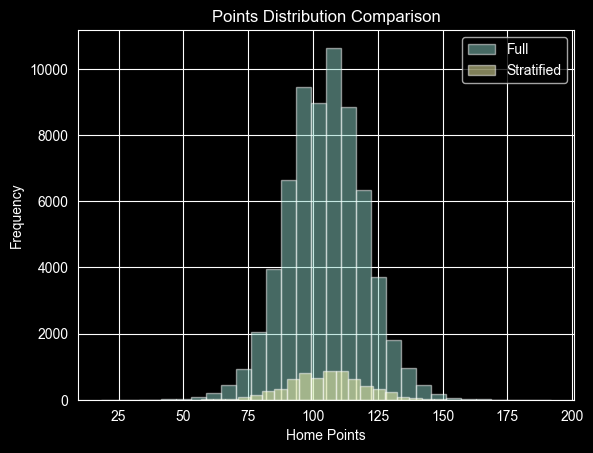

In [9]:
plt.figure()

plt.hist(df["pts_home"], bins=30, alpha=0.5, label="Full")
plt.hist(strat_sample["pts_home"], bins=30, alpha=0.5, label="Stratified")

plt.legend()
plt.title("Points Distribution Comparison")
plt.xlabel("Home Points")
plt.ylabel("Frequency")

plt.show()


### Representativeness Analysis

Stratified sampling preserved the statistical properties of the dataset most accurately. The mean, variance, and IQR values were closest to those of the full dataset. This is because stratification ensured proportional representation of all seasons.

Random sampling also performed well but showed slight deviations due to randomness.

Cluster sampling showed the largest differences. Since only selected teams were included, the sample overrepresented certain performance patterns and underrepresented others.

---

### Impact on Outlier Detection

Stratified sampling preserved outliers most effectively because it included data from all seasons.

Random sampling captured most outliers but occasionally missed rare extreme values.

Cluster sampling either overrepresented or completely missed outliers depending on selected teams.

---

### Recommendation for Real-World Projects

Stratified sampling is recommended when datasets contain meaningful categories such as seasons, classes, or groups.

Random sampling is acceptable when data is uniformly distributed.

Cluster sampling should be used when natural groups exist and full clusters are required for analysis.